In [28]:
#imports
#load some predictions
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from meld_graph.training import tp_fp_fn_tn, dice_coeff
from meld_classifier.meld_cohort import MeldSubject,MeldCohort
from meld_graph.icospheres import IcoSpheres
from meld_graph.graph_tools import GraphTools
import itertools
import pandas as pd
from meld_graph.evaluation import load_prediction
from meld_graph import experiment

In [29]:
models = [
'23-10-30_FOPF_dcop','23-10-30_MSBS_dcop_with_combat']
models = ['24-01-04_best_dcop','24-01-04_best_dcop_with_combat']
models = ['23-10-30_FOPF_dcop','23-10-30_MSBS_dcop_with_combat','23-10-30_LVHZ_dcp']
experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'


In [34]:
for model in models:
    full_results = pd.read_csv(os.path.join(experiment_dir,model,
                                          's_0','fold_all','results_best_model','test_results.csv'))
    full_results['group'] = full_results['group'].astype(bool)
    full_results['detected'] = full_results['detected'].astype(bool)
    sensitivity = np.mean(full_results['detected'][full_results['group']])
    specificity = (full_results['number FP clusters'][full_results['group']==0]>0).mean()
    total_detected = np.sum(full_results['number TP clusters'][full_results['group']])
    total_predicted = np.sum(full_results['number FP clusters'][full_results['group']])
    ppv = total_detected / (total_predicted + total_detected)
    print(model,np.round(sensitivity,2),np.round(1-specificity,2),np.round(ppv,2))

23-10-30_FOPF_dcop 0.68 0.7 0.66
23-10-30_MSBS_dcop_with_combat 0.65 0.65 0.66
23-10-30_LVHZ_dcp 0.7 0.6 0.67


In [26]:
full_results['detected']

0      False
1       True
2      False
3       True
4       True
       ...  
901    False
902    False
903     True
904     True
905     True
Name: detected, Length: 906, dtype: bool

In [36]:
#new site test results
new_sites = ['H27','H28','H101']

for model in models:
    print(model)
    print('Sensitivity,specificity,PPV')
    all_sense = []
    all_spec = []
    for new_site in new_sites:
        
        full_results = pd.read_csv(os.path.join(experiment_dir,model,
                                            's_0','fold_all',f'test_{new_site}','results_best_model','test_results.csv'))
        full_results['group']=full_results['group'].astype(bool)
        sensitivity = np.mean(full_results['detected'][full_results['group']])
        specificity = (full_results['number FP clusters'][full_results['group']==0]>0).mean()
        all_sense.append(full_results['detected'][full_results['group']])
        all_spec.append(full_results['number FP clusters'][full_results['group']==0]>0)
        total_detected = np.sum(full_results['number TP clusters'][full_results['group']])
        total_predicted = np.sum(full_results['number FP clusters'][full_results['group']])
        ppv = total_detected / (total_predicted + total_detected)
        print(new_site,np.round(sensitivity,2),np.round(1-specificity,2),np.round(ppv,2))

23-10-30_FOPF_dcop
Sensitivity,specificity,PPV
H27 0.82 0.31 0.67
H28 0.67 nan 0.47
H101 0.64 0.77 0.77
23-10-30_MSBS_dcop_with_combat
Sensitivity,specificity,PPV
H27 0.41 nan 0.62
H28 0.66 nan 0.5
H101 0.69 0.71 0.87
23-10-30_LVHZ_dcp
Sensitivity,specificity,PPV
H27 0.82 0.44 0.74
H28 0.62 nan 0.56
H101 0.73 0.78 0.86


In [42]:
all_spec

[17    False
 18     True
 19    False
 20     True
 21    False
 22     True
 23    False
 24     True
 25     True
 26     True
 27     True
 28     True
 29     True
 30    False
 31    False
 32    False
 33     True
 34    False
 Name: number FP clusters, dtype: bool,
 Series([], Name: number FP clusters, dtype: bool),
 0     False
 1      True
 2     False
 3     False
 4     False
       ...  
 80    False
 81    False
 82    False
 83    False
 84    False
 Name: number FP clusters, Length: 85, dtype: bool]

In [44]:
np.hstack(all_spec).shape

(103,)

In [45]:
np.hstack(all_sense).mean(),1-np.hstack(all_spec).mean()

(0.7288135593220338, 0.7184466019417476)

In [14]:

full_results = pd.read_csv(os.path.join(experiment_dir,'23-09-30_BMXI_big_dataset_long',
                                          's_0','fold_all','results_best_model','test_results.csv'))
sensitivity = np.mean(full_results['detected'][full_results['group']])
specificity = (full_results['number clusters'][full_results['group']==0]>0).mean()
print(sensitivity,1-specificity)
object_results = pd.read_csv(os.path.join(experiment_dir,'23-10-02_IHFS_object_detection',
                                          's_0','fold_all','results_best_model','test_results.csv'))
sensitivity = np.mean(object_results['detected'][object_results['group']])
specificity = (object_results['number clusters'][object_results['group']==0]>0).mean()
print(sensitivity,1-specificity)

0.6875 0.05405405405405406
0.8903846153846153 0.002590673575129543


In [6]:
(object_results['number clusters'][object_results['group']==0]>0).mean()

0.9459459459459459

In [ ]:

experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'
object_results = pd.read_csv(os.path.join(experiment_dir,'23-08-30_IGKW_object_save_final',
                                          's_0','fold_all','results','test_results_best.csv'))


full_results = pd.read_csv(os.path.join(experiment_dir,'23-08-30_PYHE_big_dataset_long',
                 's_0','fold_all','results','test_results_best.csv'))

In [10]:
experiment_dir = '/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/'
experiments = ['23-09-30_BMXI_big_dataset_long','23-08-30_IGKW_object_save_final']
models = ['best_model.pt']

In [38]:
exp_i=0
exp = experiment.Experiment.from_folder(os.path.join(experiment_dir,experiments[exp_i],'s_0','fold_all'))
subjects = exp.data_parameters['test_ids']
val_subjects = exp.data_parameters['train_ids']
len(subjects)
    

Initialised Experiment 23-09-30_BMXI_big_dataset_long/s_0


/home/kw350/software/gdl/meld_classifier_GDL/scripts/experiments_folder/23-09-30_BMXI_big_dataset_long/s_0/fold_all


186

In [33]:
hdf5_file =os.path.join(experiment_dir, experiments[exp_i],'s_0','fold_all','results_best_model','predictions.hdf5')
cohort = MeldCohort(hdf5_file_root=exp.data_parameters['hdf5_file_root'], dataset=exp.data_parameters['dataset'])
icospheres = IcoSpheres()
gt = GraphTools(
            icospheres,
            cohort=cohort,
            distance_mask_medial_wall=True,
)

In [40]:
def get_scores(subjects,hdf5_file,cohort,thresh):
    
    subjects_dict = {}
    sensitivity=[]
    specificity=[]
    for s, subject in enumerate(subjects):
        if s % 100 == 0:
            print(s)
        subjects_dict[subject]={}
        pred = load_prediction(subject,hdf5_file,)
        subj = MeldSubject(subject, cohort=cohort)
        if '_FCD_' in subject:
            labels = []
            boundary_zones=[]
            for hemi in ['lh','rh']:
                label = subj.load_feature_lesion_data(features=[],hemi=hemi)[1]
                if label.sum() > 0:
                    dists = gt.fast_geodesics(label.astype(np.float32)
                    )[cohort.cortex_mask]
                    borderzone = dists<20
                else:
                    borderzone = np.zeros(sum(cohort.cortex_mask),dtype=bool)
                boundary_zones.append(borderzone)
                labels.append(label[cohort.cortex_mask])
            labels = np.concatenate(labels)
            boundary_zones = np.concatenate(boundary_zones)
        else:
            labels = np.zeros(2*len(pred['rh']))
            boundary_zones = np.zeros(2*len(pred['rh']),dtype=bool)
        subjects_dict[subject]['input_labels'] = labels
        subjects_dict[subject]['boundary_zones'] = boundary_zones
        subjects_dict[subject]['result'] = np.concatenate([pred['lh'],
                                                            pred['rh']])>thresh
        pred = load_prediction(subject,hdf5_file,'prediction_clustered')
        subjects_dict[subject]['sigmoid_pred'] = np.concatenate([pred['lh'],
                                                            pred['rh']])
        if subjects_dict[subject]['input_labels'].sum():
            detected = subjects_dict[subject]['result'][subjects_dict[subject]['boundary_zones']]
            sensitivity.append(detected.any())
        else:
            fp = subjects_dict[subject]['result'].sum()
            specificity.append(fp>0)
    return subjects_dict,sensitivity,specificity

In [41]:
thresh = 0.1568896532058716
#object
thresh = 0.14944605231285094

subjects_dict = {}
sensitivity=[]
specificity=[]
for s, subject in enumerate(subjects):
    if s % 100 == 0:
        print(s)
    subjects_dict[subject]={}
    pred = load_prediction(subject,hdf5_file,)
    subj = MeldSubject(subject, cohort=cohort)
    if '_FCD_' in subject:
        labels = []
        boundary_zones=[]
        for hemi in ['lh','rh']:
            label = subj.load_feature_lesion_data(features=[],hemi=hemi)[1]
            if label.sum() > 0:
                dists = gt.fast_geodesics(label.astype(np.float32)
                )[cohort.cortex_mask]
                borderzone = dists<20
            else:
                borderzone = np.zeros(sum(cohort.cortex_mask),dtype=bool)
            boundary_zones.append(borderzone)
            labels.append(label[cohort.cortex_mask])
        labels = np.concatenate(labels)
        boundary_zones = np.concatenate(boundary_zones)
    else:
        labels = np.zeros(2*len(pred['rh']))
        boundary_zones = np.zeros(2*len(pred['rh']),dtype=bool)
    subjects_dict[subject]['input_labels'] = labels
    subjects_dict[subject]['boundary_zones'] = boundary_zones
    subjects_dict[subject]['result'] = np.concatenate([pred['lh'],
                                                           pred['rh']])>0.1568896532058716
    pred = load_prediction(subject,hdf5_file,'prediction_clustered')
    subjects_dict[subject]['sigmoid_pred'] = np.concatenate([pred['lh'],
                                                           pred['rh']])
    if subjects_dict[subject]['input_labels'].sum():
        detected = subjects_dict[subject]['result'][subjects_dict[subject]['boundary_zones']]        
        sensitivity.append(detected.any())
    else:
        fp = subjects_dict[subject]['result'].sum()
        specificity.append(fp>0)
    

0


KeyboardInterrupt: 

In [36]:
np.mean(sensitivity),1-np.mean(np.array(specificity)>0)

(0.6730769230769231, 0.7305699481865284)

In [31]:
np.mean(sensitivity),1-np.mean(np.array(specificity)>0)

(0.7053571428571429, 0.5945945945945945)

In [42]:
comparison = {}
threshes=[0.1568896532058716,0.14944605231285094]
for mi,model in enumerate(models):
    hdf5_file =os.path.join(experiment_dir, experiments[mi],'s_0','fold_all','results_best_model','predictions.hdf5')

    subjects_dict, sensitivity, specificity = get_scores(subjects,hdf5_file,cohort,thresh=threshes[mi])

    comparison[model] = [np.mean(sensitivity),1-np.mean(specificity)]
    

0
100


In [ ]:
len(subjects)

In [6]:
control_predictions = []
model=models[0]
hdf5_file =os.path.join(experiment_dir, experiments[0],'s_0','fold_all','results','predictions'+model.split('.')[0]+'.hdf5')

for s, subject in enumerate(subjects):
    if '_C_':
        pred = load_prediction(subject,hdf5_file,)
        control_predictions.append(np.concatenate([pred['lh'],
                                                              pred['rh']]))
    

In [7]:
control_predictions = np.concatenate(control_predictions)
ids = np.random.choice(len(control_predictions),size=100000,replace=True)

<AxesSubplot:ylabel='Density'>

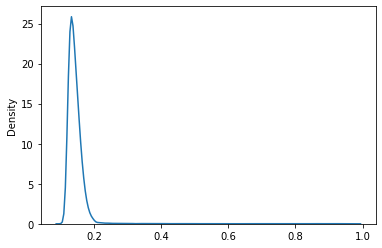

In [11]:
sns.kdeplot(control_predictions[ids])